## Intoduction to Scikit-Learn(Sklearn)


- An end-to-end scikit learn workflow
- Getting the data ready
- Choose the right estimator/Ml model/algorithm
- Fit the model/estimator/algorithm and use it make predictions on our data
- Evaluating the model
- Improve the model
- Save and load tained model
- Putting it all together

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## An end-to-end Scikit-learn workflow

In [13]:
# get the data

heart_disease=pd.read_csv('dataset/heart-disease.csv')

In [14]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# create x (features matrix/independent variables) 
x=heart_disease.drop('target',axis=1)

#creating y(label/dependent variables)
y=heart_disease['target']

In [16]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

#for knowing the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
#splitting data into train_Set and test_Set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
len(x_train)

242

In [21]:
#fitting the train_set with the classifier
clf.fit(x_train,y_train);

In [22]:
# Making predictions using the model we've just trained
y_preds=clf.predict(x_test)

In [23]:
y_preds

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [24]:
# Evaluating the mode 
clf.score(x_train,y_train)

1.0

In [25]:
clf.score(x_test,y_test)

0.8032786885245902

In [26]:
# Getting detailed information about precision of your model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [27]:
confusion_matrix(y_test,y_preds)

array([[20,  7],
       [ 5, 29]], dtype=int64)

In [28]:
accuracy_score(y_test,y_preds)

0.8032786885245902

In [29]:
# Improve a model
# Try the different amount of n_estimators (one of the default parameter)
np.random.seed(0)
for i in range(10,110,10):
    print(f'Trying model with {i} estimators')
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f'Model Accuracy on test set: {clf.score(x_test,y_test)*100:.2f}%')
    print()

Trying model with 10 estimators
Model Accuracy on test set: 78.69%

Trying model with 20 estimators
Model Accuracy on test set: 81.97%

Trying model with 30 estimators
Model Accuracy on test set: 83.61%

Trying model with 40 estimators
Model Accuracy on test set: 85.25%

Trying model with 50 estimators
Model Accuracy on test set: 81.97%

Trying model with 60 estimators
Model Accuracy on test set: 83.61%

Trying model with 70 estimators
Model Accuracy on test set: 80.33%

Trying model with 80 estimators
Model Accuracy on test set: 85.25%

Trying model with 90 estimators
Model Accuracy on test set: 83.61%

Trying model with 100 estimators
Model Accuracy on test set: 81.97%



In [30]:
# Save the model and load it

import pickle
pickle.dump(clf,open('random_forest_model_1.pkl','wb'))

In [31]:
loaded_model=pickle.load(open('random_forest_model_1.pkl','rb'))

loaded_model.score(x_test,y_test)

0.819672131147541

## 1. Getting our data ready to be used with ml

Three main things we have to do:
    - Split the data into features and labels (usually x and y)
    - Converting non numericals values into numerical values (feature encoding)
    - Filling (also called imputing ) missing values

In [32]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
x= heart_disease.drop('target',axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
y=heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 1.1- Spliting data into training and test sets

In [35]:
# In the machine learning one of the most fundamental principal is
# never elvaluate or test your model on data that it is learn from
# that's why we are splitting into training an test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### 1.2- Make sure all data is numerical

In [36]:
car_sales=pd.read_csv('dataset/car-sales-extended.csv')

In [37]:
len(car_sales)

1000

In [38]:
# split x and y
x=car_sales.drop('Price',axis=1)
y=car_sales['Price']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:

# Build machine learning model

# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()

# model.fit(x_train,y_train)
# model.score(x_test,y_test)

#machine learning model can only deal with numerical data

In [41]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [42]:
# First way to convert categorical attributes into numerical attributes

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',
                               one_hot,
                                categorical_features
                               )],
                             remainder='passthrough'
                             )
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [43]:

# Let's try refit the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(42)

# setting up new the training and test data
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

# fitting the model
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
model.score(x_test,y_test)

0.3235867221569877

In [45]:
model.score(x_train,y_train)

0.891612713353635

In [46]:
# Another way for converting categorical data into numerical

# split x and y
x=car_sales.drop('Price',axis=1)
y=car_sales['Price']

#encoding
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies.head()

categorical_features=['Colour']

# create training and test set
#from sklearn.model_selection import train_test_split
#x_train,y_train,

In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(42)

# setting up new the training and test data
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

# fitting the model
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
model.score(x_test,y_test)

0.3235867221569877

In [49]:
model.score(x_train,y_train)

0.891612713353635

### What if there were missing values ?

- Fill them with some values (also known as imputation)
- Remove the samples with missing data altogether

In [50]:
# import the dataset with missing values
car_sales_missing=pd.read_csv('dataset/car-sales-extended-missing-data.csv')
car_sales_missing.head(7)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0


In [51]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
# Lets try to encode data with missing values

# x=car_sales_missing.drop('Price',axis=1)
# y=car_sales_missing['Price']

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features=['Make','Colour','Doors']
# one_hot=OneHotEncoder()
# transformer=ColumnTransformer([('one_hor',one_hot,categorical_features)],
#                            remainder='passthrough')
# transformed_x=transformer.fit_transform(x)
# tranformed_x

Above code will show error due to missing values

#### Option 1: Fill mising data with Pandas

In [53]:
# Fill the "Make" column
car_sales_missing['Make'].fillna('missing',inplace=True)

# Fill the "Colour" column
car_sales_missing['Colour'].fillna('missing',inplace=True)

# Fill the "Odometer (Km)" column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'
                                                           ].mean(),inplace=True)

# Fill the "Doors" column
car_sales_missing['Doors'].fillna(4,inplace=True)

In [54]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [55]:
# remove the rows with missing price value
car_sales_missing.dropna(axis=0,inplace=True)

In [56]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [57]:
# split x and y
x=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

#x['Odometer (KM)'] = x['Odometer (KM)'].astype('int')
#x['Doors'] = x['Doors'].astype('int')

#encoding the data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],
                             remainder='passthrough')

transformed_x=transformer.fit_transform(x)

transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [58]:
pd.DataFrame(transformed_x.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


#### Option 2: Fill missing values with scikit-learn

In [59]:
car_sales_missing=pd.read_csv('dataset/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [60]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [61]:
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [62]:
# filling missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numericals values with mean 
# if the strategy is constant you have to pass fill_value
# this is saying over the categorical columns constantly fill them, if you find the missing value fill them with 'missing'
categorical_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
categorical_features = ['Make','Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# create an imputer (something that fills missing data)
# ColumnTransformer - Applies transformers to columns of an array or pandas DataFrame.
imputer = ColumnTransformer([
    ('categorical_imputer',categorical_imputer,categorical_features),
    ('door_imputer',door_imputer,door_feature),
    ('num_imputer',num_imputer,num_feature)
])

filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [63]:
car_sales_filled = pd.DataFrame(filled_x, columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [64]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [65]:
# let's try convert our data into numbers


# Turn the strings/categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [66]:
pd.DataFrame(transformed_x.toarray()).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [220]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()

car_sales.head(12)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

model.fit(x_train,y_train)
model.score(x_test,y_test)


0.22011714008302485

In [68]:
model.score(x_train,y_train)

0.8847250887037676

### 2.1 Picking a  machine learning model for a regression problem

In [69]:
# We are going to use one of scikit learning built in dataset
# Import Boston housing dataset

from sklearn.datasets import load_boston

boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [70]:
type(boston)

sklearn.utils.Bunch

In [71]:
# Converting dictionary into Dataframe
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [72]:
len(boston_df)

506

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000’s

In [73]:
# Let's try Ridge regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create a data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

# Split into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(x_train,y_train)

# Check the score
model.score(x_test,y_test)

0.6662221670168518

How do we improve this score ?

What is Ridge is not working ? 

Refer the scikit learn map .

In [74]:
# lets try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# Create a data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

# Split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# fit the model
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

# Evaluate the model 
regressor.score(x_test,y_test)

0.873969014117403

## 2.2 Picking a ml model for classification problem

Follow the map

In [75]:
import pandas as pd
import numpy as np

heart_disease=pd.read_csv('dataset/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
len(heart_disease)

303

In [77]:
# Lets try Linear Support Vector Classification

from sklearn.svm import LinearSVC

# Setup random seed value 
np.random.seed(42)

# create data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# Split data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# fit the model
model=LinearSVC(max_iter=250000)
model.fit(x_train,y_train)

# Evaluate the model
model.score(x_test,y_test)

C:\Users\Baraka\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8852459016393442

In [78]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# Split into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Fit the model
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

#Evaluate the model
classifier.score(x_test,y_test)

0.8524590163934426

Tidbit:
    1. If you have structured data, use ensemble methods
    2. If you have unstructured data , use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it make predictions
#### 3.1 Fitting the model to the data

Different names for :

- x=features , features variable , data
- y=labels,targets,target variables

In [79]:
# Random Forest classifier
# Import randomForestClassifier class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(100)

x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

classifier.score(x_test,y_test)

0.8387096774193549

## 3.2 Make predictions using ml model

2 ways to make predictions

- predict()
- predict_proba()

In [80]:
## prediction using predict()

In [81]:
x_test.ndim,x_test.shape

(2, (31, 13))

In [82]:
classifier.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [83]:
np.array(y_test)

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [84]:
y_preds = classifier.predict(x_test)
np.mean(y_preds == y_test)

0.8387096774193549

Make predictions using predict_proba()

In [85]:
# predict_proba() returns probabilities of a classification label
# it returns the probability of that label is being true
# ex. for 1st 0 => 0.89, 1=> 0.11 that's why result i 0
# threshold id 0.5
classifier.predict_proba(x_test[:5])

array([[0.24, 0.76],
       [0.86, 0.14],
       [0.87, 0.13],
       [0.01, 0.99],
       [0.26, 0.74]])

In [86]:
classifier.predict(x_test[:5])

array([1, 0, 0, 1, 1], dtype=int64)

predict() can also be used for regression models

In [87]:
# import the model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(50)

# create data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

# split data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the model
regressor=RandomForestRegressor()

# fit the data into model
regressor.fit(x_train,y_train)

# evaluating the model on training data
regressor.score(x_test,y_test)

0.9154870829784474

In [88]:
# Making prediction
y_preds=regressor.predict(x_test)
y_preds[:5]

array([23.028, 22.226, 20.481, 23.92 , 23.854])

In [89]:
np.array(y_test[:5])

array([27.5, 21.6, 17.7, 24.3, 22.2])

In [90]:
# Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

1.8418235294117657

## 4. Evaluating machine learning model
#### Three ways to evaluate model/estimators

- Estimator score method
- The scoring parameter
- Problem-specific metric function

### 4.1 Evaluating a model with the score method

In [91]:
# import the dataset
heart_disease=pd.read_csv('dataset/heart-disease.csv')

# import the model
from sklearn.ensemble import RandomForestClassifier

# Create x & y data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Split the data into train & test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instatiate the model
model = RandomForestClassifier()

# Fit the model to data
model.fit(x_train,y_train);

In [92]:
model.score(x_test,y_test)

0.8032786885245902

### 4.2 Evaluating a model with the scoring parameter

In [93]:
from sklearn.model_selection import cross_val_score

# Import the data set
heart_disease=pd.read_csv('dataset/heart-disease.csv')

# Import the model
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create x and y data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the model
model=RandomForestClassifier()

# Fitting the data
model.fit(x_train,y_train);


In [94]:
# score ()
model.score(x_test,y_test)

0.8524590163934426

cross validation aims to solve the problem of not training on all the data.So we're creating five models and we end up having a model trained on all of the data and avoiding getting lucky scores.

In [95]:
cross_val_score(model,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [96]:
np.random.seed(42)

# Single training and test split score
model_single_score=model.score(x_test,y_test)

#Take the mean of 5-fols cross-validation score
model_cross_val_score=np.mean(cross_val_score(model,x,y))

# Compare the two
model_single_score,model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [97]:

# default scoring parameter of classifier = mean accuracy
model.score(x_test,y_test)

0.8524590163934426

In [98]:
# Scorring parameter is set to none by default
cross_val_score(model,x,y,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

- Accuracy
- Area under ROC curve
- Confusion Matrix
- Classification report

In [99]:
# Import the model and score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Set up a random seed
np.random.seed(42)

# Create x and y data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# Instantiate the model
classifier=RandomForestClassifier()

# Cross val check
cross_val_score=cross_val_score(model,x,y)


In [100]:
np.mean(cross_val_score)

0.8248087431693989

In [101]:
print(f'Heart disease classifier cross-validated accuracy {np.mean(cross_val_score)*100:.2f}%')

Heart disease classifier cross-validated accuracy 82.48%


### Area under the receiver operating characteristics (AUC/ROC) 

* Area under curve
* Roc curve

ROC curves are a comparison of a model's true positive rate (tpr) vs model's false positive rate (fpr)

- True positive - model predicts 1 when truth is 1
- False positive - model predicts 1 when truth is 0
- True negative - model predicts 0 when truth is 0
- False negative - model predicts 0 when truth is 1

In [102]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset
heart_disease=pd.read_csv('dataset/heart-disease.csv')

# Importing the model
from sklearn.ensemble import RandomForestClassifier

# Setup the seed
np.random.seed(42)

# Create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Fitting the data into model
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

# Import the roc_curve
from sklearn.metrics import roc_curve

# Predicting the values
y_pred=classifier.predict_proba(x_test)
y_preds=classifier.predict(x_test)
y_pred[:5]
classifier.score(x_test,y_test)

0.8524590163934426

In [103]:
y_probs_positive=y_pred[:,1]
y_probs_positive[:5]

array([0.11, 0.51, 0.57, 0.16, 0.82])

In [104]:
# Calculate the fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

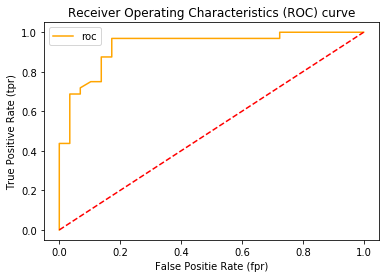

In [105]:
# Create a function to plot ROC curves for better understanding
def plot_roc_curve(fpr,tpr):
    # Plot the roc curve
    plt.plot(fpr,tpr,color='orange',label='roc')
    plt.plot([0,1],[0,1],color='red',linestyle='--')
    # customize the plot
    plt.xlabel('False Positie Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receiver Operating Characteristics (ROC) curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9304956896551724

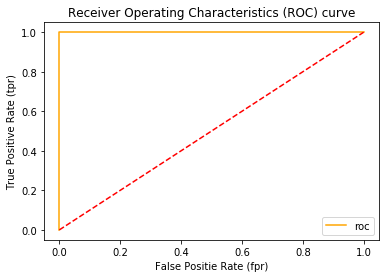

In [107]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [108]:
fpr

array([0., 0., 1.])

In [109]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

### Confusion Matrix

A confusion Matrix is a quick way to compare the label that a model predicts and the actual labels it was supposed to predict.

In [110]:
from sklearn.metrics import confusion_matrix
y_pred=classifier.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [111]:
# Visualizing the confusion matrix with pd.crosstabs
pd.crosstab(y_test,
           y_pred,
           rownames=['Actual labels'],
           colnames=['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,24,5
1,4,28


In [112]:
# Installing any package within jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.



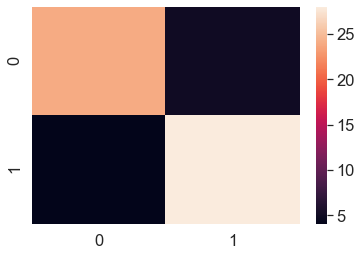

In [113]:
# Make our confusion matrix more visual with seaborn's heatmap()
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set the font_scale
sns.set(font_scale=1.5)

# Create a confusion matix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot using Seaborn
sns.heatmap(conf_mat);

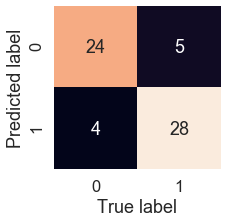

In [114]:
def plot_conf_map(conf_mat):
    '''
    Plots a confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False
                    )
    plt.xlabel('True label')
    plt.ylabel('Predicted label');
    
plot_conf_map(conf_mat)

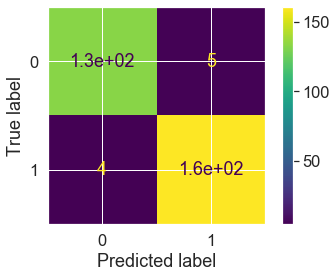

In [115]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier,x,y)

## Classification report

It is collection of different evaluation matrix rather than the single one that where the report comes from

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



- precision : indicates proportion of positive indentification (a model predicated 1) which were actually correct. A model which produces no false positives has precision of 1.0

- recall : indicates proportion of positives which were correctly classified. A model which produces no false negatives has recall of 1.0

- f1 : combination of precision & recall.A perfect model achieves an F1 score of 1.0

- support : the number of samples each metrics was calculated on (total samples of 0 -> 29, total samples of 1 -> 32)

- Accuracy : Its in decimal. Perfect accuracy is 1.0

- Macro avg : short for macro average, the average precision, recall and F1 score between classes. if you have class imbalances (29, 32), pay attention to this metrics

- Weighted avg : Short for weighted average, its average, precision, recall anf F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class( e.g. will give a high value when one class out performs another due to having more samples)


In [117]:

pd.DataFrame(classification_report(y_test,
                                   y_preds,
                                   output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.857143,0.848485,0.852459,0.852814,0.852601
recall,0.827586,0.875000,0.852459,0.851293,0.852459
f1-score,0.842105,0.861538,0.852459,0.851822,0.852300
support,29.000000,32.000000,0.852459,61.000000,61.000000


In [118]:
# When precision and recall becomes valuable

disease_true=np.zeros(10000)
disease_true[0]=1

disease_preds=np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\Baraka\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


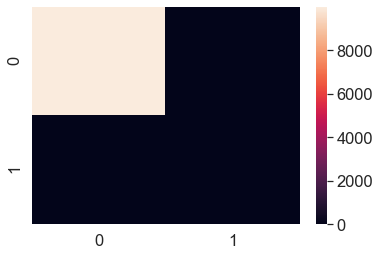

In [119]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat=confusion_matrix(disease_true,disease_preds)

sns.heatmap(conf_mat)

If your data is imbalanced then see the F1 score, if your data is not imbalanced then judging the model based on accuracy will be sufficient

To summarize classification metrics:

- Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1 )
- Pricison and recall become more important when classes are imbalanced

- if false positive predictions are worse than false negatives, aim for higher precision

- if false negative predictions are worse than false positives, aim for higher recall

- F1-score is a combinatio of precision and recall

## 4.2.2 Regression model evaluation metrics

1. R^2 (r-squared) or coefficient of determination
2. Mean Absolute Error
3. Mean Squared Error

**R^2**

what R-squared does: Compares your models predictions to the mean of the targets. Values can range from -1 (very poor model) to 1

In [120]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# Setup a random seed
np.random.seed(42)

# Create x & y
x = boston_df.drop('target',axis=1)
y = boston_df['target']

# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate the model
model = RandomForestRegressor()

# Fit the data to model 
model.fit(x_train,y_train)

# Evaluate the model on test data
model.score(x_test,y_test) 

0.873969014117403

In [121]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean

#np.full() return a new array of given shape and type
y_test_mean=np.full(len(y_test),np.mean(y_test))

In [122]:
y_test_mean[:5]

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529])

In [123]:
np.mean(y_test)

21.488235294117644

In [124]:
r2_score(y_test, y_test_mean)

0.0

In [125]:
r2_score(y_test,y_test) # if we predict y_test values perfectly it R^2 value would be 1

1.0

**Mean Absolute Error (MAE)**

MAE is the average of the absolute differnces between predictions and actual values. It gives you an idea of how wrong your models predictions are. (absolute means turn -ve values into +ve)

In [126]:
from sklearn.metrics import mean_absolute_error

y_preds =model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [127]:
df=pd.DataFrame(data={'actual values ':y_test,
                     'predicted values':y_preds})
df['difference']=df['predicted values']-df['actual values ']

In [128]:
np.average(abs(df['difference']))

2.1226372549019623

so basically what this is saying is that on an average every prediction our model predicts is either +2.11 or -2.11 from actual values 

**Mean Sqaured Error (MSE)**

In [129]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_preds)
mse

9.242328990196082

In [130]:
np.average(np.square(df['difference']))

9.242328990196082


Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means RMSE or MSE should be more useful when large errors are particularly undesirable.

The three tables below show examples where MAE is steady and RMSE increases as the variance associated with the frequency distribution of error magnitudes also increases.

### Summarizing Machine Learning Model Evaluation

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

`Classification Model Evaluation Metrics/Techniques`

- Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

- Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

- Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

- F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

- Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

- Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

- Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

- ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

- Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

`Which classification metric should you use?`

- **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

- **Precision** and **recall** become more important when classes are imbalanced.

- If false-positive predictions are worse than false-negatives, aim for higher precision.

- If false-negative predictions are worse than false-positives, aim for higher recall.

- **F1-score** is a combination of precision and recall.

- A confusion matrix is always a good way to visualize how a classification model is going.

`Regression Model Evaluation Metrics/Techniques`

- **R^2 (pronounced r-squared) or the coefficient of determination** - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

- **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

- **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

`Which regression metric should you use?`

- **R2** is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

- **MAE** gives a better indication of how far off each of your model's predictions are on average.

- As for **MAE** or **MSE**, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

- Pay more attention to MAE: When being \\$ 10,000 off is twice as bad as being \\$5,000 off.

- Pay more attention to MSE: When being \\$10,000 off is more than twice as bad as being \\$5,000 off.



### 4.2.3 Scoring parameter

In [131]:
# Import the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Import the dataset
heart_disease=pd.read_csv('dataset/heart-disease.csv')

# Create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# Split the training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the model
classifier=RandomForestClassifier()

# Fit the model
classifier.fit(x_train,y_train);

In [132]:
classifier.score(x_test,y_test)

0.8524590163934426

In [133]:
# Cross validation check
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cv_acc=cross_val_score(classifier,x,y,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [134]:
# Cross validated accuracy
cv_acc=cross_val_score(classifier,x,y,scoring='accuracy')
print(f"The cross validated accuracy is {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is 80.18%


In [135]:
cv_precision=cross_val_score(classifier,x,y,scoring='precision')
print(f'The cross validated precision is {np.mean(cv_precision)*100:.2f}')

The cross validated precision is 82.09


In [136]:
cv_recall=cross_val_score(classifier,x,y,scoring='recall')
np.mean(cv_recall)

0.8484848484848484

**For Regression model**

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

boston=load_boston()

# Converting dictionary into Dataframe
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])

# Set up a random seed
np.random.seed(42)

# Create data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

#Split into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the model
regressor=RandomForestRegressor()

# Fit the model to data
regressor.fit(x_train,y_train)

# Evaluate the model
regressor.score(x_test,y_test)

0.873969014117403

In [138]:
# Cross validation
from sklearn.model_selection import cross_val_score

np.random.seed(42)
cv_r2=cross_val_score(regressor,x,y,scoring=None)
np.mean(cv_r2)

0.622375083951403

In [139]:
np.random.seed(42)
cv_r2=cross_val_score(regressor,x,y,scoring='r2')
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [140]:
# r squared
np.random.seed(42)
cv_mae = cross_val_score(regressor,x,y,scoring='neg_mean_absolute_error')
cv_mae

array([-2.12870588, -2.58823762, -3.3420198 , -3.75555446, -3.34263366])

In [141]:
# Mean Absolute error
np.random.seed(42)
cv_mse = cross_val_score(regressor,x,y,scoring='neg_mean_squared_error')
cv_mse

array([ -7.99104182, -12.88009356, -20.06894699, -45.70549288,
       -19.77049657])

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [142]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


classifier=RandomForestClassifier()

classifier.fit(x_train,y_train)

y_preds=classifier.predict(x_test)

# Evaluate the classifier
print('Classifier metrics on the test set')
print(f'Accuracy : {accuracy_score(y_test,y_preds)*100:.2f}')
print(f'Precision : {precision_score(y_test,y_preds)*100:.2f}')
print(f'Recall : {recall_score(y_test,y_preds)*100:.2f}')
print(f'F1: {f1_score(y_test,y_preds)*100:.2f}')

Classifier metrics on the test set
Accuracy : 85.25
Precision : 84.85
Recall : 87.50
F1: 86.15


**For Regression model**

In [143]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Set up a random seed
np.random.seed(42)

# Create x & y
x = boston_df.drop('target',axis=1)
y = boston_df['target']

# Split into train & test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# Instiate the model
model = RandomForestRegressor()

# Fit the model to data
model.fit(x_train,y_train)

y_preds = model.predict(x_test)

# Evaluate the model
print(f'R2 score : {r2_score(y_test,y_preds)*100:.2f}')
print(f'Mean absolute error : {mean_absolute_error(y_test,y_preds)}')
print(f'Mean Squared error  : {mean_squared_error(y_test,y_preds)}')

R2 score : 87.40
Mean absolute error : 2.1226372549019623
Mean Squared error  : 9.242328990196082


## 5. Improving a model

First prediction = baseline prediction First model = baseline model

From a data perspective:

- Could we collect more data? (generally, the more data, the better)
- Could we improve our data?
From a model perspective:

- Is there a better model we could use?
- could we improve a current model?

**Parameters vs Hyperparameters**

- Parameters - model find these patterns in data
- Hyperparameters - Setting on a model you can adjust to (potentially) improve its ability to find patterns

**Three ways to adjust Hyperparameters**

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [144]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [145]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameters by hand

Lets make 3 sets, training, validation and test

In [146]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**We're going to try and adjust:**

- max_depth
- max_features
- min_samples_leaf
- min_samples_split
- n_estimators

In [150]:
def evaluate_preds(y_true, y_preds):
    '''
    performs comparison on y_true labels vs. y_pred labels
    on a classification model
    '''
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                   'precision': round(precision,2),
                   'recall': round(recall,2),
                   'f1': round(f1,2)
                  }
    print(f'Accuracy : {accuracy*100:.2f}%')
    print(f'Precision : {precision*100:.2f}%')
    print(f'Recall : {recall:.2f}')
    print(f'F1 : {f1:.2f}')
    
    return metric_dict

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart_disease=pd.read_csv('dataset/heart-disease.csv')

In [152]:
from sklearn.ensemble import RandomForestClassifier

# Set up a random seed
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Create x and y
x=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

# Split into train validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the length of our data
validation_split = round(train_split + 0.15 * len(heart_disease_shuffled))

x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:validation_split],y[train_split:validation_split]
x_test,y_test=x[validation_split:],y[validation_split:]

# Instantiate model
classifier=RandomForestClassifier()

# Fit the model to training data
classifier.fit(x_train,y_train)

# Make the baseline prediction
y_preds=classifier.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metric = evaluate_preds(y_valid,y_preds)
baseline_metric

Accuracy : 82.22%
Precision : 81.48%
Recall : 0.88
F1 : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [169]:

# Setup a random seed
np.random.seed(42)

# Create a second classifier with different hyperparameter
model_2 = RandomForestClassifier(n_estimators=100)

# Fit the model to training data
model_2.fit(x_train,y_train)

# Make baseline predictions
y_preds = model_2.predict(x_valid)

# Evaluate the classifier on validation set
model_2_metric = evaluate_preds(y_valid,y_preds)
model_2_metric

Accuracy : 91.11%
Precision : 92.00%
Recall : 0.92
F1 : 0.92


{'accuracy': 0.91, 'precision': 0.92, 'recall': 0.92, 'f1': 0.92}

In [154]:
# Setup a random seed
np.random.seed(42)

# Create a second classifier with different hyperparameter
model_3 = RandomForestClassifier(n_estimators=100,max_depth=10)

# Fit the model to training data
model_3.fit(x_train,y_train)

# Make baseline predictions
y_preds = model_3.predict(x_valid)

# Evaluate the classifier on validation set
model_3_metric = evaluate_preds(y_valid,y_preds)
model_3_metric

Accuracy : 80.00%
Precision : 80.77%
Recall : 0.84
F1 : 0.82


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

### 5.2 Hyperparameter tuning with RandomizedSearchCV (Randomized Search Cross Validation)

In [156]:
# Import
from sklearn.model_selection import RandomizedSearchCV

hyper_dict={'n_estimators':[10,100,200,500,1000,1200],
           'max_depth':[None,5,10,20,30],
           'max_features':['auto','sqrt'],
           'min_samples_split':[2,4,6],
           'min_samples_leaf':[1,2,4]
           }
# Setup a random seed
np.random.seed(42)

# Create x and y
x=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier
classifier=RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCv
rs_classifier=RandomizedSearchCV(estimator=classifier,
                                param_distributions=hyper_dict,
                                n_iter=5, #number of models to try
                                verbose=2)

rs_classifier.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimato

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.2s
[CV] n_estimators=500, min_samples

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.2s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [157]:
rs_classifier.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [172]:
rs_y_preds=rs_classifier.predict(x_test)
rs_metrices=evaluate_preds(y_test,rs_y_preds)

Accuracy : 80.33%
Precision : 75.00%
Recall : 0.86
F1 : 0.80


### 5.3 Hyperparameter tuning with GridSearchCV

In [160]:
hyper_dict

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [161]:
# reducing the number of hyperparameters -> less combinations -> less models to train
hyper_dict_2 =  {'n_estimators': [100, 200, 500],
                 'max_depth': [None, 5, 10],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_split': [6],
                 'min_samples_leaf': [1, 2]}

In [162]:
from sklearn.model_selection import GridSearchCV,train_test_split

# Setup a random seed
np.random.seed(42)

# Create x and y
x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instatiate RandomForestClassifier
model = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV (it will automatically make validation set for us)
gs_model = GridSearchCV(estimator=model,
                              param_grid=hyper_dict_2,
                              verbose=2
                             ) 

# Fit the RandomizedSearchCV version of model 
gs_model.fit(x_train,y_train);


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   49.7s finished


In [166]:
rs_y_preds=rs_classifier.predict(x_test)
gs_metric=evaluate_preds(y_test,rs_y_preds)

Accuracy : 80.33%
Precision : 75.00%
Recall : 0.86
F1 : 0.80


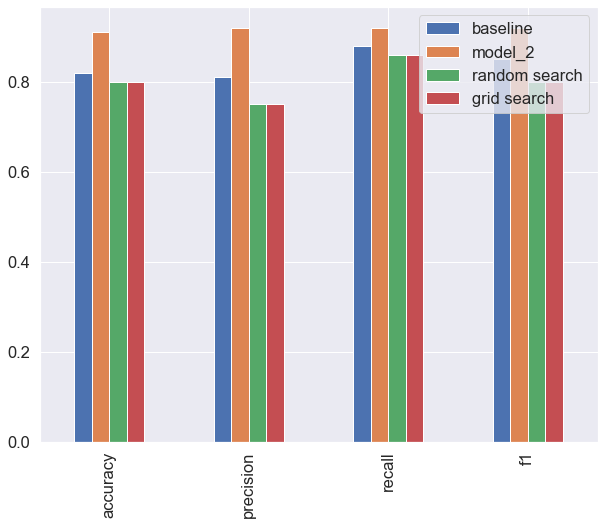

In [173]:

compare_metrics = pd.DataFrame({'baseline':baseline_metric,
                                 'model_2':model_2_metric,
                                 'random search':rs_metrices,
                                  'grid search':gs_metric})
compare_metrics.plot.bar(figsize=(10,8))

## 6 Saving and loading trained ml model

Two Ways to save and load ml model:
- With Python's pickle module
- With the joblib module

`Pickle`

In [174]:
import pickle

# saving an existing model to file
pickle.dump(gs_model,open('gs_model.pkl','wb'))

In [175]:
# load saved model
loaded_gs_model = pickle.load(open('gs_model.pkl','rb'))

In [176]:
pickle_y_preds = loaded_gs_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

Accuracy : 81.97%
Precision : 77.42%
Recall : 0.86
F1 : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

`Joblib`

**If your model is large it may be more efficient to use joblib over pickle**

In [179]:
from joblib import dump,load
# Save model to file
dump(gs_model,filename='gs_model.joblib')

['gs_model.joblib']

In [180]:
# import a saved joblib model
loaded_joblib_model = load(filename='gs_model.joblib')

In [181]:
# Make some predictions
joblib_y_preds = loaded_gs_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

Accuracy : 81.97%
Precision : 77.42%
Recall : 0.86
F1 : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together

In [182]:
car_sales=pd.read_csv('dataset/car-sales-extended-missing-data.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [183]:
len(car_sales)

1000

In [185]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [187]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):

1. Fill missing data
2. Convert data to numbers
3. Build the model to data

In [225]:
# Getting data ready
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# Setup a random seed
np.random.seed(42)

# Import data and drop with missing labela
car_sales=pd.read_csv('dataset/car-sales-extended-missing-data.csv')

car_sales.dropna(subset=['Price'],inplace=True)
# Define different features and transformer pipelines
categorical_features = ['Make','Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
     ( 'onehot',OneHotEncoder(handle_unknown='ignore'))])

door_feature=['Doors']
door_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=4))
])


numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))
])

# Setup preprocessing step(fill missing values then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat',categorical_transformer,categorical_features),
                        ('door',door_transformer,door_feature),
                        ('numeric',numeric_transformer,numeric_features)
                    ])

# creating a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor',preprocessor),
                        ('model', RandomForestRegressor())])
# Create x & y data
x = car_sales.drop('Price',axis=1)
y = car_sales['Price']

# Split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Fit the model to data
model.fit(x_train,y_train)

# Evaluating model on test data
model.score(x_test,y_test)

,Make,Colour,Odometer (KM),Doors
986,Honda,White,71934.0,4.0
297,Toyota,Red,162665.0,4.0
566,Honda,White,42844.0,4.0
282,Honda,White,195829.0,4.0
109,Honda,Blue,219217.0,4.0
77,NaN,White,126669.0,4.0
741,Toyota,Blue,76416.0,4.0
822,Nissan,White,114699.0,4.0
82,Nissan,Blue,180021.0,3.0
644,Honda,Blue,28561.0,4.0


In [226]:
categorical_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
categorical_features = ['Make','Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('categorical_imputer',categorical_imputer,categorical_features),
    ('door_imputer',door_imputer,door_feature),
    ('num_imputer',num_imputer,num_feature)
])
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [228]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# Set up a random seed
np.random.seed(42)

# Import data and delete missing labels
car_sales = pd.read_csv('dataset/car-sales-extended-missing-data.csv')
car_sales.dropna(subset=['Price'],inplace=True)

# Define different features and transformers
cat_features =['Make','Colour']
cat_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                                  ('onehot',OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value=4))])

odometer_feature = ['Odometer (KM)'] 
odometer_tranformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean'))])

# Setup preprocessing steps (filling missing values and convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ('cat',categorical_transformer,cat_features),
    ('door',door_transformer,door_feature),
    ('num',odometer_tranformer,odometer_feature)
])

# Creating a preprocessing and modelling a pipeline
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor())
])

# Create x & y
x = car_sales.drop('Price',axis=1)
y = car_sales['Price']

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Fit the model to data
model.fit(x_train,y_train)

# Evaluate the model on test data
model.score(x_test,y_test)


0.22188417408787875

In [229]:
## GridSearchCV

from sklearn.model_selection import GridSearchCV

pipe_grid={
    'preprocessor__num__imputer__strategy':['mean','median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    'model__max_features':['auto'],
    'model__min_samples_split':[2,4]
}
gs_model = GridSearchCV(estimator=model,
                        param_grid=pipe_grid,
                        verbose=2)

gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                 

In [231]:

gs_model.score(x_test,y_test)

0.3339554263158365